# <font size="300"> Calculating Why Customers Churn </font>

 <tr>
    <td> <img src="pexels-lukas-590020.jpg" alt="Drawing" style="width: 100px;"/> </td>
    <td> <img src="pexels-burak-kebapci-187041.jpg" alt="Drawing" style="width: 100px;"/> </td>
    </tr>

[Source Photo 1](https://www.pexels.com/photo/person-holding-pen-pointing-at-graph-590020/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels) 
[Source Photo 2](https://www.pexels.com/photo/space-grey-ipad-air-with-graph-on-brown-wooden-table-187041/?utm_content=attributionCopyText&utm_medium=referral&utm_source=pexels) 

<font size="4"> We will begin with the necessary imports we will need for this project. </font>

In [1]:
##General imports we need for the project
import pandas as pd
import os
import env
import warnings
warnings.filterwarnings('ignore')
import numpy

##Imports for graphing
import matplotlib.pyplot as plt
import seaborn as sns
import graphviz
from graphviz import Graph

##Import prep and acquire functions
from acquire import get_telco_data
from prepare import prep_telco

##Import sklearn functinos
from sklearn.dummy import DummyClassifier
from sklearn.model_selection import train_test_split

##Import sklearn models
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import export_graphviz
from sklearn import tree

##Import sklearn metrics
from sklearn.metrics import accuracy_score
from sklearn.metrics import precision_score
from sklearn.metrics import recall_score
from sklearn.metrics import f1_score
from sklearn.metrics import confusion_matrix
from sklearn.metrics import classification_report

##Import statistics functinos
import scipy.stats as stats
from scipy.stats import mannwhitneyu

## Project planning


 - We will created a `README.md` with a data dictionary, project goals. We also established our initial hypotheses in this `README.md` file.
 
 - Acquire data using the function `get_telco_data`. This function will be saved to the `acquire.py` file, which we imported to this notebook above.
 
 - We will clean and prepare teh data using the function `prep_telco`. This function will be saved to the `prepare.py` file, which we imported to this notebook above.
 
 - Clearly define two hypotheses and an $\alpha$ value. We will run statistical tests on these hypotheses, then determine whether or not to reject the null hypothesis. We will documents our findings in each case.  
 
 - Establish and document a baseline accuracy. 
 
 - Train classification modules. We will evaluate these models on our train and validate datasets. 
      - We will compare the accuracy of these models to the baseline accuracy. 

 - We will choose the model that performs the best and try that model on the test dataset once. 
 
 - Create a CSV file with `customer_id`, probability of churn, and prediction of churn, based on the results of our best performing model. 
 
 - Finish with key takeaways, recommendations, and next steps.

## Execute Summary

 - I created three models `DecisionTree`, `RandomForest`, and `KNeighbors`. 
 
 - I found that the `RandomForest` with `max_depth=3` model performed with high accuracy and the highest recall score of all the models on both the train and validate dataset. I concluded that the recall dataset was most important because we want to capture all customers who churn. Overestimating churn rate is better than underestimating churn rate. Furthermore, this model outperformed our baseline accuracy of $0.73$, so it has value.
 
 - With more time I would like to explore the relationship between the following variables and churn `contract_type_id`, `tenure`, `monthly_charges`, and `payment_type_id`.
 
 - We know that the customers most likely to churn are customers on a month-to-month contract. 
     - Our `DecisionTree` model indicated that among customers on a month-to-contract, the biggest predictors of churn are having `monthly_charges` less than \$68.42 or having tenure of 5 months or less. Thus, I recommend limiting the month-to-month contract option to customers who satisfy one of the following criteria:
         - At least \$68.42 in monthly charges. 
         - At least six months of tenure.

## Acquire data

Now we will acquire the necessary data we will need for this project. We will utilize a function called `get_telco_data` from our `acquire.py` file. For more information about the `get_telco_data` function, please refer to the mentioned `acquire.py` file.

In [2]:
df = get_telco_data()

In [3]:
df.head()

,customer_id,gender,senior_citizen,partner,dependents,tenure,phone_service,multiple_lines,internet_service_type_id,online_security,...,streaming_movies,contract_type_id,paperless_billing,payment_type_id,monthly_charges,total_charges,churn,contract_type,internet_service_type,payment_type
0,0016-QLJIS,Female,0,Yes,Yes,65,Yes,Yes,1,Yes,...,Yes,3,Yes,2,90.45,5957.9,No,Two year,DSL,Mailed check
1,0017-DINOC,Male,0,No,No,54,No,No phone service,1,Yes,...,No,3,No,4,45.20,2460.55,No,Two year,DSL,Credit card (automatic)
2,0019-GFNTW,Female,0,No,No,56,No,No phone service,1,Yes,...,No,3,No,3,45.05,2560.1,No,Two year,DSL,Bank transfer (automatic)
3,0056-EPFBG,Male,0,Yes,Yes,20,No,No phone service,1,Yes,...,No,3,Yes,4,39.40,825.4,No,Two year,DSL,Credit card (automatic)
4,0078-XZMHT,Male,0,Yes,No,72,Yes,Yes,1,No,...,Yes,3,Yes,3,85.15,6316.2,No,Two year,DSL,Bank transfer (automatic)


### Get info

Let's get info for each column in our dataframe.

In [7]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 7043 entries, 0 to 7042
Data columns (total 27 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   customer_id               7043 non-null   object 
 1   gender                    7043 non-null   object 
 2   senior_citizen            7043 non-null   int64  
 3   partner                   7043 non-null   object 
 4   dependents                7043 non-null   object 
 5   tenure                    7043 non-null   int64  
 6   phone_service             7043 non-null   object 
 7   multiple_lines            7043 non-null   object 
 8   internet_service_type_id  7043 non-null   int64  
 9   online_security           7043 non-null   object 
 10  online_backup             7043 non-null   object 
 11  device_protection         7043 non-null   object 
 12  tech_support              7043 non-null   object 
 13  streaming_tv              7043 non-null   object 
 14  streamin

### Describe data

Now we will describe key statistics for our dataframe.

In [9]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
senior_citizen,7043.0,0.162147,0.368612,0.00,0.0,0.00,0.00,1.00
tenure,7043.0,32.371149,24.559481,0.00,9.0,29.00,55.00,72.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00
monthly_charges,7043.0,64.761692,30.090047,18.25,35.5,70.35,89.85,118.75
contract_type_id,7043.0,1.690473,0.833755,1.00,1.0,1.00,2.00,3.00
internet_service_type_id,7043.0,1.872923,0.737796,1.00,1.0,2.00,2.00,3.00
payment_type_id,7043.0,2.315633,1.148907,1.00,1.0,2.00,3.00,4.00


### Value counts of data

No we will run a loop to get value counts for each column.

In [4]:
for c in df.columns:
    print ("---- %s ---" % c)
    print (df[c].value_counts())

---- customer_id ---
7799-LGRDP    1
4115-UMJFQ    1
8205-VSLRB    1
2037-SGXHH    1
2958-NHPPS    1
             ..
3446-QDSZF    1
1399-UBQIU    1
4806-HIPDW    1
7319-VENRZ    1
1750-CSKKM    1
Name: customer_id, Length: 7043, dtype: int64
---- gender ---
Male      3555
Female    3488
Name: gender, dtype: int64
---- senior_citizen ---
0    5901
1    1142
Name: senior_citizen, dtype: int64
---- partner ---
No     3641
Yes    3402
Name: partner, dtype: int64
---- dependents ---
No     4933
Yes    2110
Name: dependents, dtype: int64
---- tenure ---
1     613
72    362
2     238
3     200
4     176
     ... 
28     57
39     56
44     51
36     50
0      11
Name: tenure, Length: 73, dtype: int64
---- phone_service ---
Yes    6361
No      682
Name: phone_service, dtype: int64
---- multiple_lines ---
No                  3390
Yes                 2971
No phone service     682
Name: multiple_lines, dtype: int64
---- internet_service_type_id ---
2    3096
1    2421
3    1526
Name: internet_se

### Distributions of individual variables

<center><font size="4"> Gender <font size>

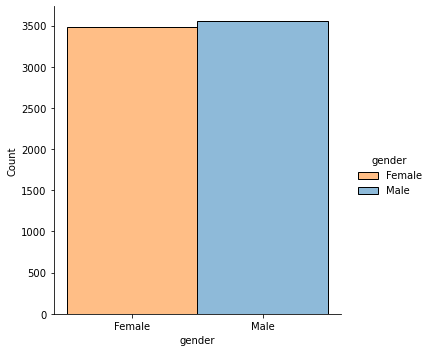

In [13]:
gender_distribution = sns.displot(df, x = df.gender, discrete = True, hue = "gender", palette=["C1", "C0"])

<center><font size="4"> Senior Citizen <font size>

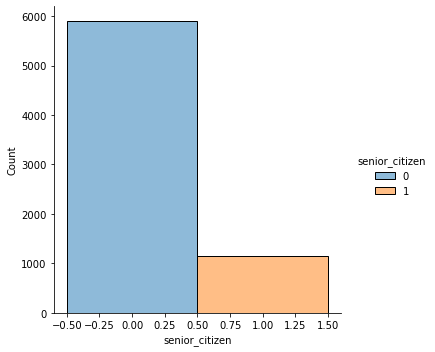

In [16]:
gender_distribution = sns.displot(df, x = df.senior_citizen, discrete = True, hue = "senior_citizen")

<center><font size="4"> Partner <font size>

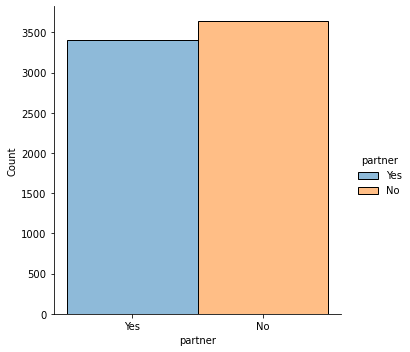

In [17]:
gender_distribution = sns.displot(df, x = df.partner, discrete = True, hue = "partner")

<center><font size="4"> Dependents <font size>

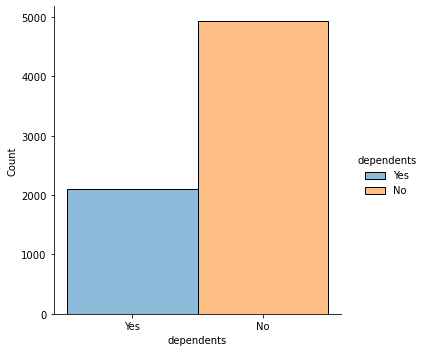

In [19]:
dependents_distribution = sns.displot(df, x = df.dependents, discrete = True, hue = "dependents")

<center><font size="4"> Tenure <font size>

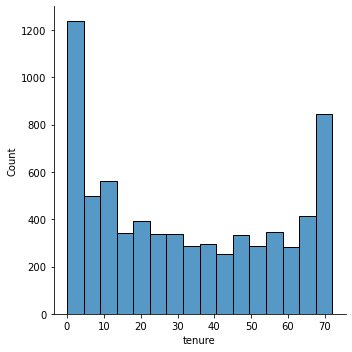

In [14]:
tenure_distribution = sns.displot(df, x="tenure")

<center><font size="4"> Phone Service <font size>

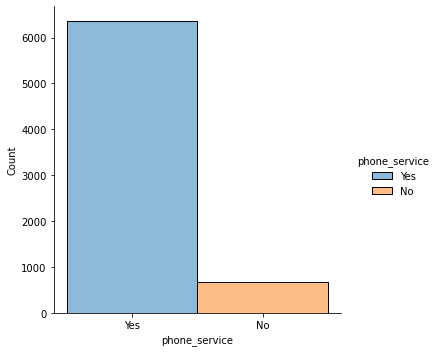

In [20]:
phone_service_distribution = sns.displot(df, x = df.phone_service, discrete = True, hue = "phone_service")

<center><font size="4"> Multiple Lines <font size>

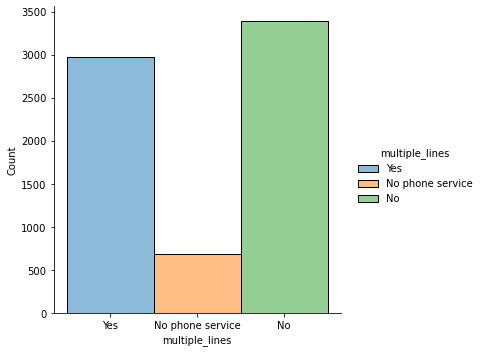

In [22]:
multiple_lines_distribution = sns.displot(df, x = df.multiple_lines, discrete = True, hue = "multiple_lines")

<center><font size="4"> Internet Service ID <font size>

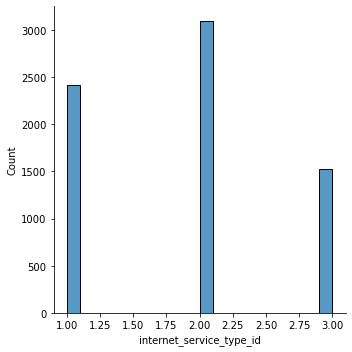

In [51]:
multiple_lines_distribution = sns.displot(df, x = df.internet_service_type_id)

<center><font size="4"> Online Security <font size>

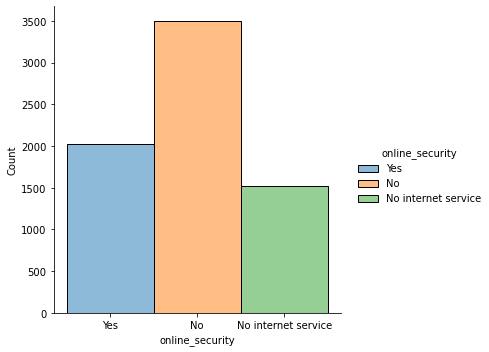

In [53]:
online_security_distribution = sns.displot(df, x = df.online_security, discrete = True, hue = "online_security")

<center><font size="4"> Online Backup <font size>

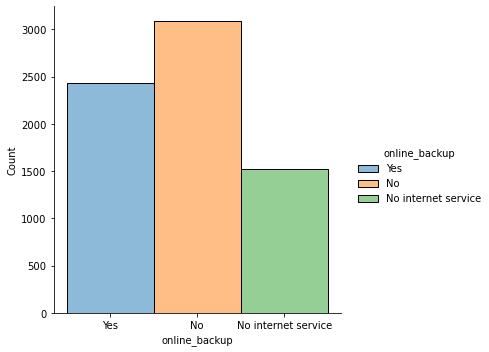

In [57]:
online_backup_distribution = sns.displot(df, x = df.online_backup, discrete = True, hue = "online_backup")

<center><font size="4"> Device Protection <font size>

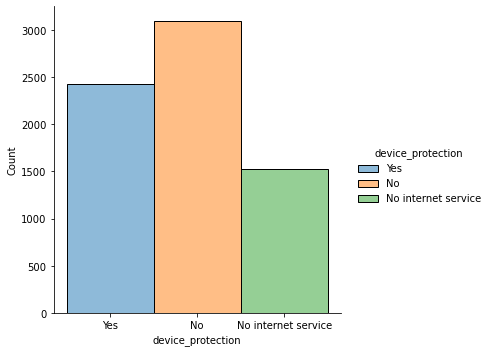

In [58]:
device_protection_distribution = sns.displot(df, x = df.device_protection, discrete = True, hue = "device_protection")

<center><font size="4"> Tech Support <font size>

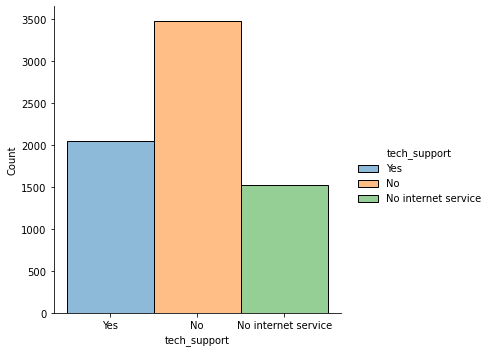

In [6]:
tech_support_distribution = sns.displot(df, x = df.tech_support, discrete = True, hue = "tech_support")

<center><font size="4"> Streaming TV <font size>

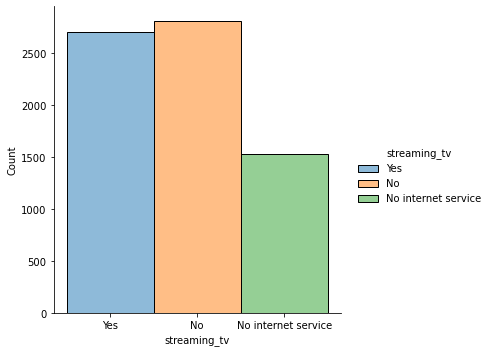

In [9]:
streaming_tv_distribution = sns.displot(df, x = df.streaming_tv, discrete = True, hue = "streaming_tv")

<center><font size="4"> Streaming Movies <font size>

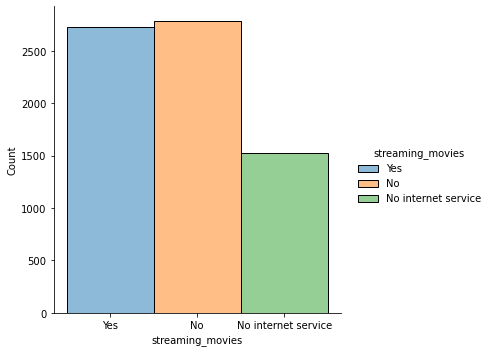

In [11]:
streaming_movies_distribution = sns.displot(df, x = df.streaming_movies, discrete = True, hue = "streaming_movies")

<center><font size="4"> Contract Type ID <font size>

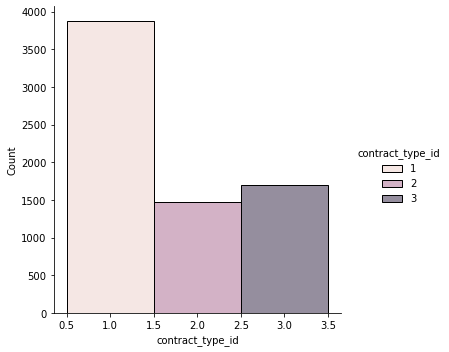

In [13]:
contract_type_id_distribution = sns.displot(df, x = df.contract_type_id, discrete = True, hue = "contract_type_id")

<center><font size="4"> Paperless Billing <font size>

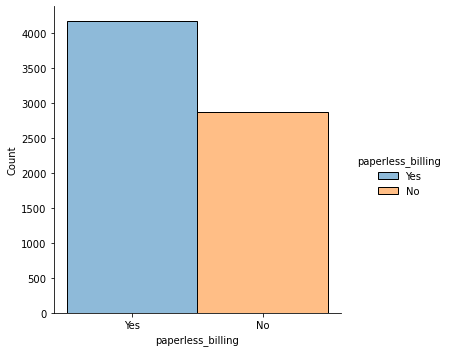

In [14]:
paperless_billing_distribution = sns.displot(df, x = df.paperless_billing, discrete = True, hue = "paperless_billing")

<center><font size="4"> Payment Type ID <font size>

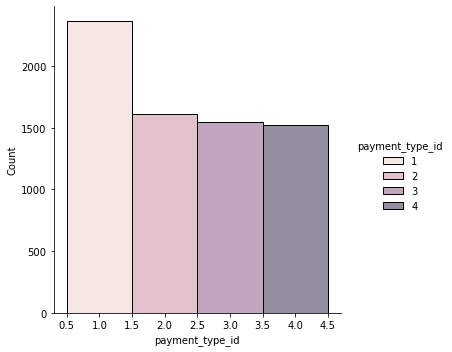

In [16]:
payment_type_id_distribution = sns.displot(df, x = df.payment_type_id, discrete = True, hue = "payment_type_id")

<center><font size="4"> Monthly Charges <font size>

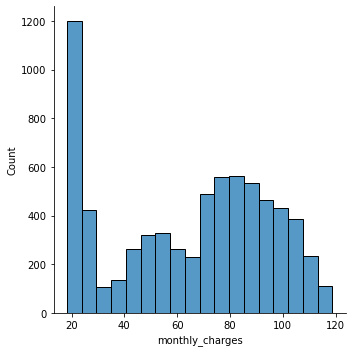

In [16]:
monthly_charges_distribution = sns.displot(df, x='monthly_charges')

<center><font size="4"> Churn <font size>

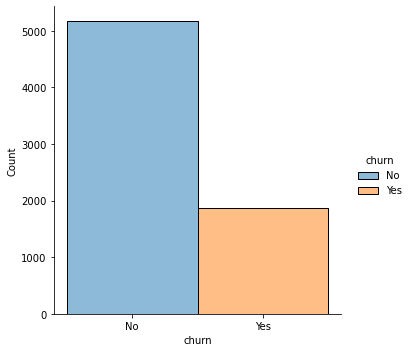

In [17]:
churn_distribution = sns.displot(df, x = df.churn, discrete = True, hue = "churn")

<center><font size="4"> Contract Type <font size>

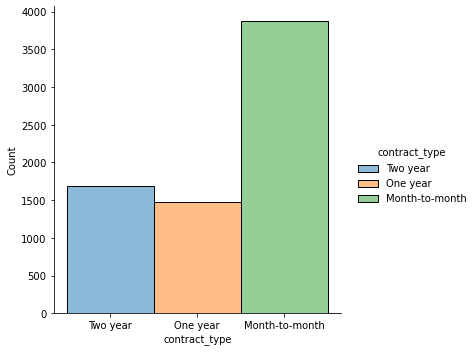

In [19]:
contract_type_distribution = sns.displot(df, x = df.contract_type, discrete = True, hue = "contract_type")

<center><font size="4"> Internet Service Type <font size>

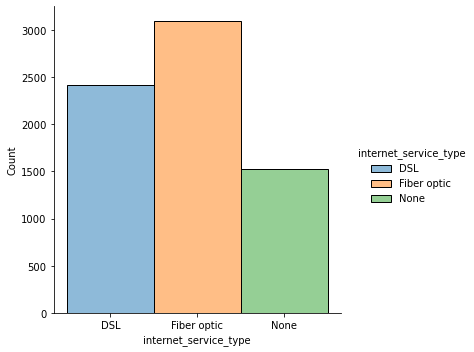

In [20]:
internet_service_type_distribution = sns.displot(df, x = df.internet_service_type, discrete = True, hue = "internet_service_type")

<center><font size="4"> Payment Type <font size>

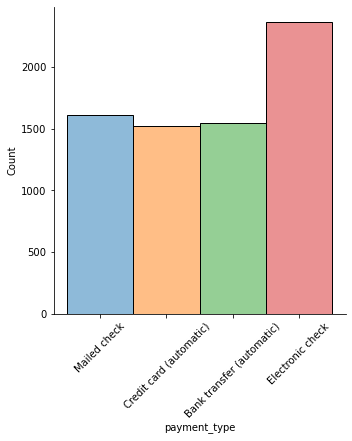

In [29]:
payment_type_distribution = sns.displot(df, x = df.payment_type, discrete = True, hue = "payment_type", legend = False)
payment_type_distribution.set_xticklabels(rotation=45)

### Acquire takeaways

 - I wrote a function containing SQL query to obtain my DataFrame of Telco data.
 - I used `info()`, `describe()`, and `value_counts()` on this DataFrame.
 - I utilized seaborn to build distribution graphs for the features of this DataFrame.

## Data Preparation

Now we will clean the data we need for this project. We will use a function called `prep_telco` from the file `prepare.py`. The `prep_telco` function will also split our data into `train`, `validate`, and `test` datasets.

For more information about the function `prep_telco`, please see the file `prepare.py` in this repository.

In [60]:
train, validate, test = prep_telco(df)

In [68]:
print("Shape of train data:", train.shape)
print("Shape of validate data:", validate.shape)
print("Shape of test data:", test.shape)

Shape of train data: (3943, 28)
Shape of validate data: (1691, 28)
Shape of test data: (1409, 28)


### Prepare takeaways